<a href="https://colab.research.google.com/github/LunabaLeeris/Regression-Notebook/blob/main/LinearRegressionGradientDescentipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Using a gradient descent formula for approximating a function using linear regression called the update function**


> $$
\theta^{k + 1} = \theta^k - \alpha T(T^t\theta^k- y)
$$

$\theta^k$  :  $n$ dimensional matrix representing the values of the parameters

$\theta^{k + 1}$  : represents the new matrix after the computation

$\alpha$ : a constant scalar value which is the learning rate

$T$: matrix representing the training data where cols = training data at $i$ and rows = dimension/input/feature

$T^t$: transform of T where now row is the i’th training data and columns is the dimensions

$y$ : is a single column representing the actual values where row is the ith training data

**Visualizing**

In order to visualize the approximation, I compared the plot from different dimensions of the regression line and the training feature/output plot.

In [ ]:
from pdb import run
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

T = tf.constant([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                [21, 22, 23, 24, 25, 26, 27, 28, 29, 30]], dtype=tf.float32)

T_t = tf.transpose(T);

y =  tf.constant([[1],
                  [2],
                  [3],
                  [4],
                  [5],
                  [6],
                  [7],
                  [8],
                  [9],
                  [10]], dtype=tf.float32)

theta = tf.Variable(tf.random.normal((3, 1)), dtype=tf.float32)
a = .00012

total_iterations = 0

def run_gradient_descent():
  while True:
      iterations = int(input(f"how many iterations you want?\ntotal: {total_iterations}\n"))

      if iterations == -1:
        break

      total_iterations += iterations

      while iterations > 0:
        diff = tf.matmul(T_t, theta) - y
        theta.assign(theta - a*(tf.matmul(T, diff)))
        iterations -= 1

      compareAtDimension(total_iterations, 0)
      compareAtDimension(total_iterations, 1)
      compareAtDimension(total_iterations, 2)

# Helper Functions
def guess():
  print("please input 3 values, I will predict its result")
  first = float(input("first value"))
  second = float(input("second value"))
  third = float(input("third value"))

  prediction = tf.matmul(tf.constant([[first, second, third]], dtype=tf.float32), theta)
  print(f"my prediction: {prediction}")

def compareAtDimension(total, dimension):
  if dimension > len(T):
    return

  x = T[dimension]
  x_line = np.linspace(0, 40, 500)
  y_prediction = theta[dimension] * x_line

  plt.scatter(x, y, label="scatter plot of training data at dimension " + str(dimension) + " after " + str(total) + " iteration(s)")
  plt.scatter(x_line, y_prediction, label="prediction at dimension " + str(dimension) + " after " + str(total) + " iteration(s)")

  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('prediction at dimension ' + str(dimension))

  plt.legend()
  plt.show()

# main
run_gradient_descent()


**Now given the same training data, let's use the normal equation**

$$
\theta = X^Ty/X^TX = (X^TX)^{-1}X^Ty
$$

Let X be a design matrix composed of the training features where the rows represent the i’th training feature and $y$ be a column vector composed of the actual values of the training data. We also let $\theta$ be a column vector composed of our parameters.
$$
X = \begin{bmatrix}...X{(i)}...\\.\\.\\.\\...X{(n)}...\end{bmatrix} \theta= \begin{bmatrix}\theta_i\\.\\.\\.\\\theta_n\end{bmatrix} y = \begin{bmatrix}y_i\\.\\.\\.\\y\end{bmatrix}
$$

NOTE: Using our given, $$T = X^t$$ and $$T_t = X$$

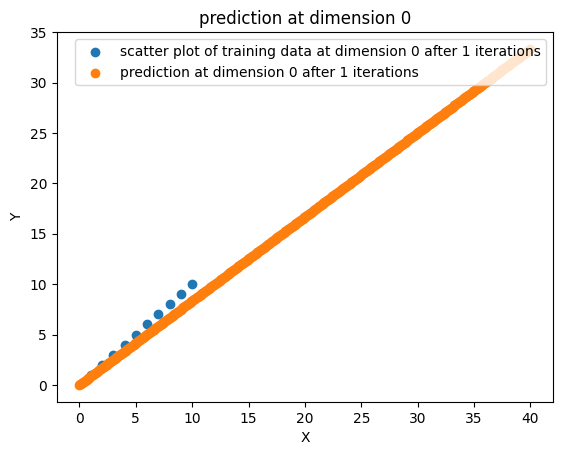

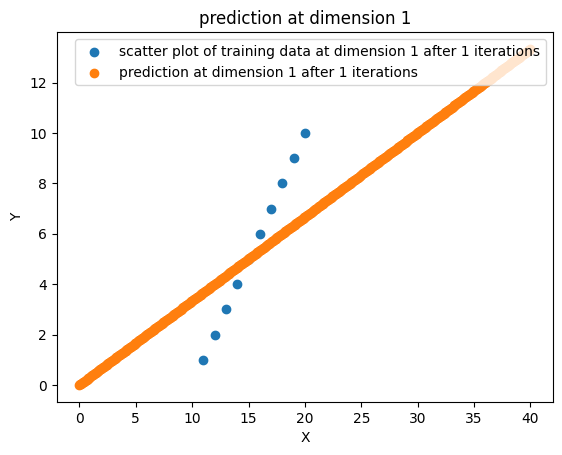

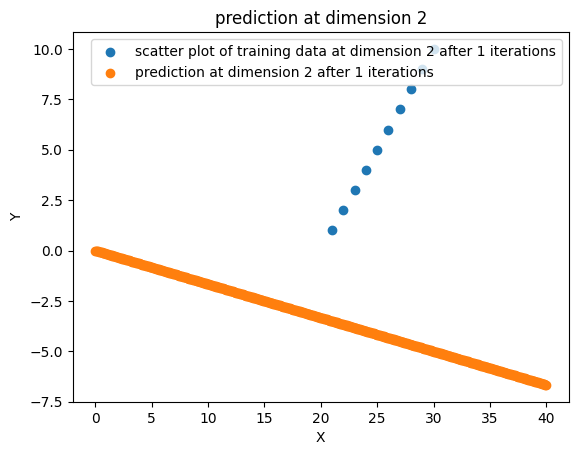

In [ ]:
def run_normal_equation():
  theta.assign(tf.matmul(tf.linalg.pinv(tf.matmul(T, T_t)), tf.matmul(T, y)))

  compareAtDimension(1, 0)
  compareAtDimension(1, 1)
  compareAtDimension(1, 2)

run_normal_equation()